# Conceptualization and Verification of Maximum Stress Criterion

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

<img src="farfieldstress.png" width="500"/>

In [2]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
f = sp.Symbol(r'f', nonnegative = True)
tau_fps

## Representation of Far field stress in terms of Stress Intensity factors
In this section, the far field stresses will be represented in terms of Stress Intensity factors. The schematics assume that we have a far field stress in the horizontal direction represented as $\sigma_x$ with respect to an angled crack represent by angle $\beta$ with respect to this horizontal boundary condition.The stress field in this case will be given as:
\begin{align}
\sigma_{xz} = 
\left[
\begin{array}{cc}
\sigma_{x} & 0 \\
0 & 0
\end{array}
\right]
\end{align}
and the rotated stress field depicted in figure below is shown as:
\begin{align}
\sigma_{t} = 
\left[
\begin{array}{cc}
\sigma_{nn} & \sigma_{nt} \\
\sigma_{nt} & \sigma_{np}
\end{array}
\right]
\end{align}
However, to transform the global stress field into local with respect to the angle $\beta$ can be done with the help of rotation matrix. Hence,
\begin{align}
R = 
\left[
\begin{array}{cc}
c_b & -s_b \\
s_b & c_b
\end{array}
\right]
\end{align}
\begin{align}
\sigma_{t} = 
\left[
\begin{array}{cc}
\sigma_{nn} & \sigma_{nt} \\
\sigma_{nt} & \sigma_{np}
\end{array}
\right] = 
R^T \sigma_{xz} R
\end{align}
In order to convert the local stress field into SIF's to take into account crack length: 
\begin{gather*}
K_I = \sqrt{\pi a} \sigma_{nn}\\
K_{II} = \sqrt{\pi a} \sigma_{nt}
\end{gather*}
Here, $K_I$ represents the mode I opening failure whereas, $K_{II}$ depicts the sliding failure. The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$

<img src="transformationofstressfield.png" width="500"/>

In [3]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

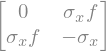

In [4]:
sigma_ff = sp.Matrix([[0, f * sigma_x],
                    [ f * sigma_x, -sigma_x]])
sigma_ff

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

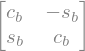

In [5]:
Rot = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
Rot

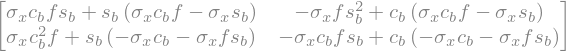

In [6]:
SIF_field = Rot.T * sigma_ff * Rot
SIF_field

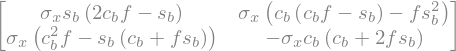

In [7]:
sp.simplify(SIF_field)

In [8]:
K_I = sp.sqrt(sp.pi * a) * sp.simplify(SIF_field[0,0])
K_II  = sp.sqrt(sp.pi * a) * sp.simplify(SIF_field[1,0])
K_I, K_II

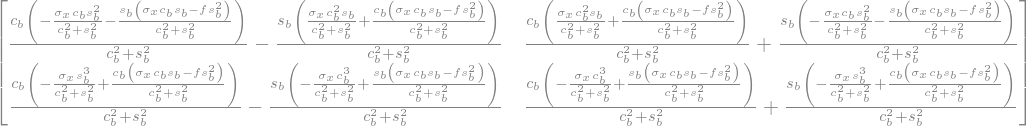

In [9]:
a = sp.Matrix([[- sigma_x * s_b**2, sigma_x*s_b*c_b - f*s_b**2],
               [sigma_x*s_b*c_b - f*s_b**2, - sigma_x * c_b**2]]) #
#a = sp.simplify(SIF_field)
l = (Rot.T).inv() * a * Rot.inv()
#l = Rot.inv() * a * (Rot.T).inv()
l

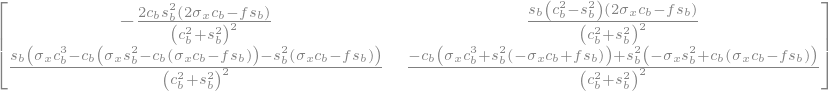

In [10]:
sp.simplify(l)

In [11]:
params1 = {beta:45*np.pi/180}

In [12]:
K_I_ = K_I#.subs(params)
K_II_ = K_II#.subs(params)
K_I_, K_II_

In [13]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [14]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

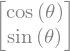

In [15]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

## Stress Equation
Dominant term for stresses can be obtained as:
\begin{gather*}
\sigma_{ij} = \frac{\left[ K_I S_{ij}^I(\theta) + K_{II} S_{ij}^{II}(\theta) \right]}{\sqrt{2\pi r}}
\end{gather*}
where $K_I$, $K_{II}$ represents the Stress Intensity Factors for Mode I and Mode II failures and $S^I_{ij}(\theta)$ , $S_{ij}^{II}(\theta)$ depicts the Angular functions for Mode I and Mode II which are given as:
Angular functions for Mode I:
\begin{align}
S^{I} = 
\left[
\begin{array}{cc}
S^{I}_{11} & S^{I}_{12} \\
S^{I}_{12} &  S^{I}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
2 \cos\frac{\theta}{2} -\cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] & \cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} \\
\cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} &  \cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right]
\end{array}
\right] 
\end{align}
Angular functions for Mode II:
\begin{align}
S^{II} = 
\left[
\begin{array}{cc}
S^{II}_{11} & S^{II}_{12} \\
S^{II}_{12} &  S^{II}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
-2 \sin\frac{\theta}{2} - \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2} & \cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] \\
\cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] &  \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2}
\end{array}
\right] 
\end{align}

## Angular Function

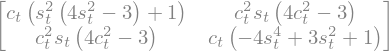

In [16]:
s_3t = 3 * s_t - 4 * s_t**3
c_3t = 4 * c_t**3 - 3 * c_t
S_I_11 = 2 * c_t - c_t * (1 + s_t * s_3t) 
S_I_22 = c_t * (1 + s_t * s_3t)
S_I_12 = c_t * s_t * c_3t
S_I = sp.Matrix([[S_I_11, S_I_12],[S_I_12, S_I_22]])
S_I_ = sp.simplify(S_I)
S_I_

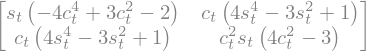

In [17]:
S_II_11 = - 2 * s_t - s_t * c_t * c_3t  
S_II_22 = s_t * c_t * c_3t
S_II_12 = c_t * (1 - s_t * s_3t)
S_II = sp.Matrix([[S_II_11, S_II_12],[S_II_12, S_II_22]])
S_II_ = sp.simplify(S_II)
S_II_

## Stress Equation at the Crack tip in Cartesian Coordinates

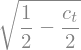

In [18]:
c_t_h = sp.sqrt((1 + c_t)/2)
s_t_h = sp.sqrt((1 - c_t)/2)
s_t_h

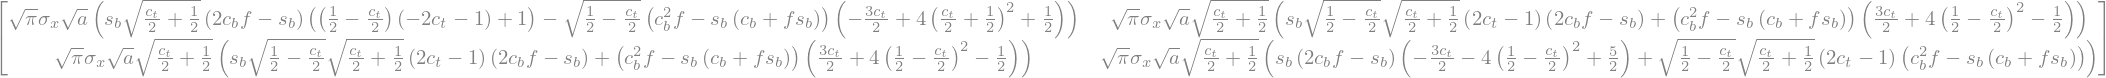

In [19]:
sigma = sp.Matrix([[K_I * S_I_[0,0] + K_II * S_II_[0,0], K_I * S_I_[0,1] + K_II * S_II_[0,1]],
                   [K_I * S_I_[0,1] + K_II * S_II_[0,1], K_I * S_I_[1,1] + K_II * S_II_[1,1]]])
sigma_ = sp.simplify(sigma)
sigmaa = sigma_.subs(c_t, c_t_h).subs(s_t, s_t_h)
sigmaa

## Stress Transformation from Cartesian to Polar Coordinates
To transform from cartesian to polar coordinates, Transformation Matrix will be taken into account i.e.:
\begin{align}
T_t = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\end{align}
Now, in order to transform from cartesian to polar the following transformation will be done. i.e.:
\begin{align}
\sigma_t = T_t^T \sigma_{ij} T_t 
\end{align}

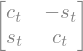

In [20]:
T_t = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])
T_t

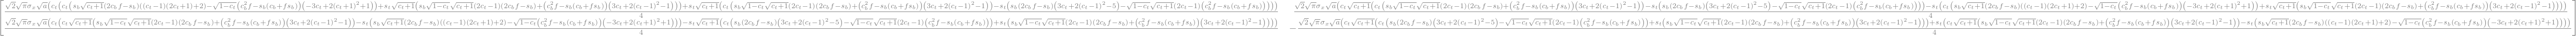

In [21]:
sig_p = T_t.T * sigmaa * T_t
sig_sim = sp.simplify(sig_p)
sig_sim

Replacing sine component with cosine for transforming the equation into a single trignometric ratio for simpicity.

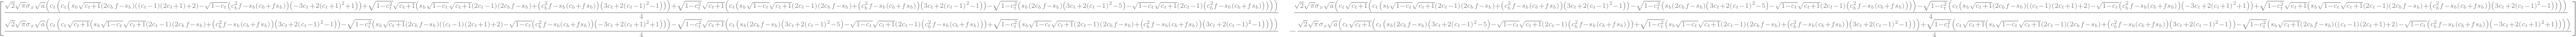

In [22]:
s_t_ = sp.sqrt(1 - c_t**2)
sig = sig_sim.subs(s_t, s_t_)
sig

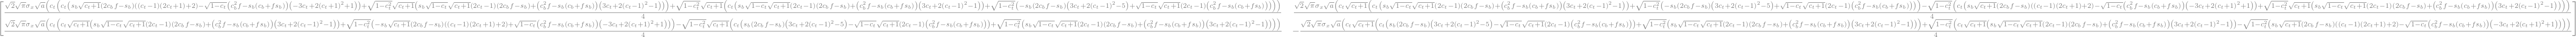

In [23]:
sig_ = sp.simplify(sig)
sig_

Solving the stress field to calculate angle $\theta$ following the Maximum Tangential Stress Theory. According to the Maximum Tangental Stress Theory, when the stress $\sigma_{\theta \theta}$ is maximum depicting principal stress than $\sigma_{r \theta}$ becomes:  
\begin{gather*}
\sigma_{r \theta} = 0
\end{gather*}

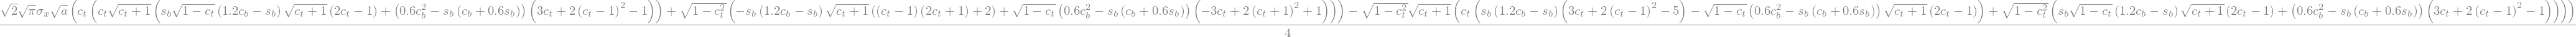

In [24]:
f_val = 0.6
s = sig_[1,0].subs(f, f_val)
s

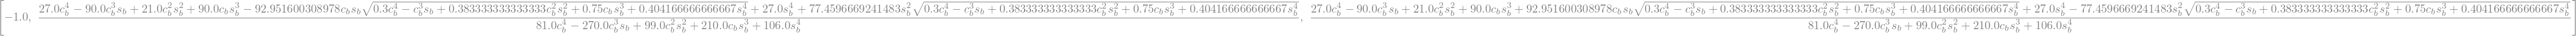

In [25]:
#f_val = 0.6
theta_sol = sp.solve(s, c_t)
#theta_sol = sp.solve(s, c_t)
theta_sol

In [ ]:
f_val = 0
s_ = sig_[1,0].subs(f, f_val)
theta_sol_ = sp.solve(s, c_t)
theta_sol_

In [ ]:
theta_val = theta_sol[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
#theta_val = theta_sol[2].subs(c_b, sp.cos(90 * np.pi/180 - beta)).subs(s_b, sp.sin(90 * np.pi/180 - beta))
theta_ = sp.acos(theta_val)
theta_

In [ ]:
get_theta = sp.lambdify((beta), theta_, 'numpy')
get_theta

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_ = np.linspace(0, 90 * np.pi/180, 100)
theta_ = get_theta(beta_) 
ax1.plot(beta_ * 180/np.pi, theta_ * 180/ np.pi, color='blue', lw=2)
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
#_.savefig("plotMTSwithsigma_x.pdf", bbox_inches='tight')

In [ ]:
theta_ * 180/ np.pi 

In [ ]:
beta_ * 180/np.pi

## Mixity Parameter

In [ ]:
M_e = (2 / sp.pi) * sp.atan(K_I_/K_II_)
theta_0 = 90 - beta
get_theta_0 = sp.lambdify((beta), theta_0, 'numpy')
M_e_ = M_e.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
M_e_

In [ ]:
get_M_e = sp.lambdify((beta), M_e_, 'numpy')
get_M_e

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
beta_ = np.linspace(90 * np.pi/180, 0, 100)
theta_0_ = get_theta_0(beta_)
theta_ = get_theta(beta_)
M_e_val = get_M_e(beta_)
ax1.plot(M_e_val, theta_ * 180/ np.pi, color='blue', lw=2)
ax1.set_xlabel(r'$M^e$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
theta_0_

In [ ]:
M_e_val

## Critical Stress Intensity factor as a function of Crack Length

In [ ]:
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
a = sp.Symbol(r'a', nonnegative = True)
K_Ic = sigma_x * sp.sqrt( sp.pi * a)
K_Ic

In [ ]:
params_ = {sigma_x : 5}

In [ ]:
get_K_Ic = sp.lambdify((a), K_Ic.subs(params_), 'numpy')
get_K_Ic
#K_Ic.subs(params_)

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
a_ = np.linspace(0, 200, 100)
K_Ic_ = get_K_Ic(a_)
ax1.plot(a_, K_Ic_, color='blue', lw=2)
ax1.set_xlabel(r'$a$'); ax1.set_ylabel(r'$K_{Ic}$')
ax1.legend()

## $\sigma_{\theta \theta}$ against Crack Length $a$

In [ ]:
cs_beta = sp.Matrix([sp.cos(beta), sp.sin(beta)])
sig_theta = sig_[1,1].subs(c_t, cs_theta_[0]).subs(s_b, cs_beta[1]).subs(c_b, cs_beta[0])
sig_theta

In [ ]:
param = {sigma_x : 500, r : 0.1}
ss = sp.simplify(sig_theta.subs(param))
get_sig_theta = sp.lambdify((a, beta, theta), ss, 'numpy')
get_sig_theta

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
a_ = np.linspace(0, 100, 100)
beta_ = 53 * np.pi/180
theta_ = get_theta(beta_) 
sig_theta_ = get_sig_theta(a_, beta_, theta_)
ax1.plot(a_, sig_theta_, color='blue', lw=2)
ax1.set_xlabel(r'$a$'); ax1.set_ylabel(r'$\sigma_{\theta}$')
ax1.legend()

In [ ]:
params = {beta : 90 * np.pi / 180}
K_Ic =  sig_[1,1].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
K_Ic_ = K_Ic.subs(params)
K_Ic_

## Normalized Parameters

In [ ]:
K_Ic = sigma_x * sp.sqrt( sp.pi * a)
K_Ic

In [ ]:
Norm_K_I = K_I / K_Ic
Norm_K_I_ = Norm_K_I.subs(s_b, sp.sin(beta))
Norm_K_I_

In [ ]:
get_Norm_K_I = sp.lambdify((beta), Norm_K_I_, 'numpy')
get_Norm_K_I

In [ ]:
Norm_K_II = K_II / K_Ic
Norm_K_II_ = Norm_K_II.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
Norm_K_II_

In [ ]:
get_Norm_K_II = sp.lambdify((beta), Norm_K_II_, 'numpy')
get_Norm_K_II

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_I_K_Ic = get_Norm_K_I(beta_)
K_II_K_Ic = get_Norm_K_II(beta_)
ax1.plot(K_I_K_Ic, K_II_K_Ic, color='blue', lw=2)
ax1.set_xlabel(r'$K_{If}/K_{Ic}$'); ax1.set_ylabel(r'$K_{IIf}/K_{Ic}$')
ax1.legend()

## R-Curve
The fracture of quasi-brittle materials can be depicted by an R-curve which is also termed as fracture resistance. R-Curve is an envelope of energy release rate. For quasi-brittle materials, R is an increasing and convex function. This curve may be dependent on specimen geometry and material. 
A figure shown below highlights that the convex envelope of R-curve serves as the limit for crack gorwth, beyond which the unstable crack grows.


<img src="Rcurve.png" width="500"/>

For an infinite size specimen, the energy release rate is given by:
\begin{gather*}
G = \frac{\sigma^2 \pi a f_1^2}{E}
\end{gather*}
where, $\sigma = \frac{Ps}{b^2}$ for three point bending beam, $a$, $E$ represent the crack length and the modulus of elasticity respectively. The term $f_1$ in $\alpha$ equation is a geometry factor for the stress intensity factor and its value is equal to 1.123 for three point beam.

In [ ]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
alpha = sp.Symbol('alpha', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
a_c = sp.Symbol('a_c', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
S = sp.Symbol('S', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
COD = sp.Symbol('COD', nonnegative = True)
K_Ic = sp.Symbol('K_{Ic}', nonnegative = True)

In [ ]:
params = {f_2 : 1.42, 
          E: 28900, #N/mm2
          P_max : 10, #N 
          D : 19, #mm
          H_0 : 3, #mm
          B : 76.2, #mm
          S : 304.8, #mm
          P : 120, #N
          pi : 3.14, 
          a_0: 16, #mm
          f_1: 1.123,
          COD : 0.0094, ##mm
          K_Ic : 26.3 #N/mm2
         }

In [ ]:
sigma_x = (P * S) / B**2
sigma_x_ = sigma_x.subs(params)
sigma_x_

In [ ]:
G = (sigma_x_ * pi * a * f_1**2)/E
G

In [ ]:
G_ = G.subs(params)
G_

In [ ]:
get_G = sp.lambdify((a), G_, 'numpy')
get_G

With reference to Shah, the Crack Mouth Opening Displacement can be calculated as follows:
\begin{gather*}
CMOD = \frac{4 \sigma f_2}{E}
\end{gather*}

In [ ]:
CMOD = (4 * sigma_x.subs(params) * f_2.subs(params)) / E.subs(params)
CMOD

For the case, when critical crack mouth opening displacement $CMOD_c$ is known from experiment, the crack opening displacement $COD$ can be obtained from the equation given by Jenq and Shah:
\begin{gather*}
COD = CMOD_c\left[\left(1 - \frac{a_0}{a}\right)^2 + \left(1.081 - 1.149 \left(\frac{a}{D}\right)\right)\left[\frac{a_0}{a} - \left(\frac{a_0}{a}\right)^2\right]\right]^{1/2} 
\end{gather*}
In order to obtain the $COD_c$ at the tip of the crack we will replace $x$ with $a_0$. 

In [ ]:
#COD = CMOD * sp.sqrt((1 - a_0/a)**2 + (1.081 - 1.149*(a/D))*(a_0/a - (a_0/a)**2))
#COD_ = COD.subs(params)
#a_ = alpha * a_0
#COD_a = COD_.subs(a, a_)
#COD_a

In order to obtain R-Curve the following equation is to be evaluated:
\begin{gather*}
R = \beta_2 \psi (a - a_0)^{d_{2}}
\end{gather*}
The value of $\psi$ is normally close to one, hence it can be ignored whereas to calculate factor $\beta_2$ two critical conditions have to be considered i.e. $K_I = K_{IC}$ and $COD = CTOD_c$. Therefore, with reference to Maximum Tangential Stress Criterion $K_{IC}$ will be calculated as:
\begin{gather*}
K_{Ic} = \sigma_x \sqrt{\pi a}
\end{gather*}

In [ ]:
#K_Ic = sigma_x_ * sp.sqrt( sp.pi * a)
#K_Ic_ = K_Ic.subs(a, a_)
#K_Ic_

With reference to Shah, the value of $\beta_2$ can be calculated as:
\begin{gather*}
\beta_2 = \frac {K_{Ic}^2 (\alpha a_0 - a_0)^{-d_2}}{E \left(1 - \frac{d_2 - \frac{\alpha - 1}{\alpha}}{d_1 - \frac{\alpha - 1}{\alpha}} \right)}
\end{gather*}
and the unknown terms $\alpha$, $d_{1,2}$ in the above equation can be obtained from:
\begin{gather*}
\alpha = \frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + \sqrt {\frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + 1} \\
d_{1,2} = \frac{1}{2} + \frac{\alpha - 1} {\alpha} \pm \sqrt{\left(\frac{1}{4} + \frac{\alpha - 1} {\alpha} - \left(\frac{\alpha - 1} {\alpha}\right)^2\right)}
\end{gather*}
where, $f_2$ is a geometry parameter ad is equal to 1.42 for three point bend beam. $\alpha$ is the precritical stable crack growth ($\alpha \geq 1$). It is equal to 1 for a pure brittle material whereas it is greater than 1 for quasi-brittle materials. 

In [ ]:
alpha = (pi * E**2 * f_1**2 * COD**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_ = sp.simplify(alpha.subs(params))
alpha_

In [ ]:
d_1 = (1/2) + ((alpha_ - 1) / alpha_) + sp.sqrt(1/4 + (alpha_ - 1) / alpha_ - ((alpha_ - 1) / alpha_)**2)
d_2 = (1/2) + ((alpha_ - 1) / alpha_) - sp.sqrt(1/4 + (alpha_ - 1) / alpha_ - ((alpha_ - 1) / alpha_)**2)
d_1_ = d_1.subs(params)
d_2_ = d_2.subs(params)
d_2_, d_1_

In [ ]:
#get_d_1 = sp.lambdify((a), d_1_, 'numpy')
#get_d_1

In [ ]:
#get_d_2 = sp.lambdify((a), d_2_, 'numpy')
#get_d_2

In [ ]:
beta_2 = (K_Ic**2 * (alpha_ * a_0 - a_0)**-d_2) / (E * (1 - (d_2 - ((alpha_-1)/alpha_))/(d_1 - ((alpha_-1)/alpha_))))
beta_2_ = beta_2.subs(params)
beta_2_

In [ ]:
#get_beta_2 = sp.lambdify((a), beta_2_, 'numpy')
#get_beta_2

In [ ]:
R = beta_2_ * (a - a_0)**d_2
R_ = R.subs(params)
#sp.simplify(R_)
R_

In [ ]:
get_R = sp.lambdify((a), R_, 'numpy')
get_R

The value of R must not exceed its maximum value which is:
\begin{gather*}
R_{Ic} = \frac{K_{Ic}^2}{E}
\end{gather*}

In [ ]:
R_Ic = (K_Ic)**2 / E
#R_Ic_ =R_Ic.subs(a, a_c_).subs(params)
R_Ic_ = R_Ic.subs(params)
R_Ic_

In [ ]:
#get_R_Ic = sp.lambdify((s_b), R_Ic_, 'numpy')
#get_R_Ic

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
a = np.linspace(16, 100, 100)
a_g = np.linspace(0, 100, 100)
R = get_R(a) 
#R_I_c = R_Ic_
G = get_G(a_g)
ax1.plot(a , R, color='orange', lw=2, label= 'R-curve')
ax1.plot(a_g , G, color='blue', lw=2, label= 'G')
#ax1.plot(a , R_I_c, color='yellow', lw=2)
ax1.set_xlabel(r'$a$'); ax1.set_ylabel(r'$G$')
ax1.legend()

In [ ]:
R

In [ ]:
G